In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('beer_reviews.csv')
len(df)

1586614

In [121]:
np.mean(df['review_overall'])

3.8155808533140387

In [2]:
df.sort_values(by='beer_abv', ascending=False)[0:1]


,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
12919,6513,Schorschbräu,1316780901,4.0,4.0,4.0,kappldav123,Eisbock,4.0,3.5,Schorschbräu Schorschbock 57%,57.7,73368


1. Regarding sorting beer_abv result, "Schorschbräu" produces the strongest beers by ABV%

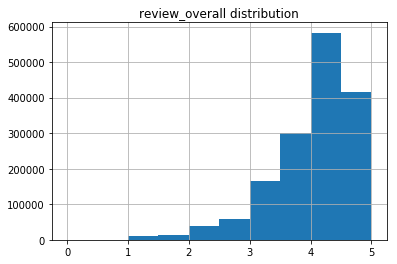

In [152]:
df['review_overall'].hist()
plt.title('review_overall distribution')
plt.show()

In [113]:
# print(len(df))
df_statistic=df[['beer_name', 'review_overall']].groupby(['beer_name']).agg(['mean', 'count','std']).reset_index()
# df_statistic.sort_values([('review_overall', 'count')], ascending=False)


There are 56857 beers, 1586614 reviews

[array([1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
       1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
       1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
       1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
       1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
       1.00e+00, 1.00e+00, 1.00e+00, 2.00e+00, 2.00e+00, 2.00e+00,
       2.00e+00, 2.00e+00, 2.00e+00, 2.00e+00, 2.00e+00, 2.00e+00,
       2.00e+00, 2.00e+00, 2.00e+00, 2.00e+00, 2.00e+00, 2.00e+00,
       3.00e+00, 3.00e+00, 3.00e+00, 3.00e+00, 3.00e+00, 3.00e+00,
       3.00e+00, 3.00e+00, 4.00e+00, 4.00e+00, 4.00e+00, 4.00e+00,
       4.00e+00, 4.00e+00, 5.00e+00, 5.00e+00, 5.00e+00, 5.00e+00,
       6.00e+00, 6.00e+00, 6.00e+00, 7.00e+00, 7.00e+00, 7.00e+00,
       8.00e+00, 8.00e+00, 9.00e+00, 1.00e+01, 1.00e+01, 1.10e+01,
       1.20e+01, 1.30e+01, 1.50e+01, 1.60e+01, 1.80e+01, 2.00e+01,
       2.20e+01, 2.50e+01, 2.80e+01, 3.20e+01, 3.70e+01, 4.30

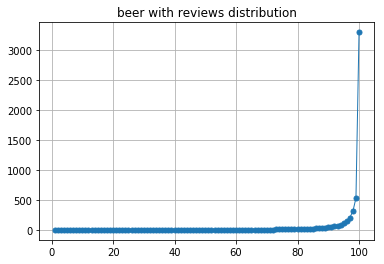

In [181]:
review_overall_percentile = [np.percentile(df_statistic['review_overall']['count'], list(range(1,101)))]
print(review_overall_percentile)
plt.plot(list(range(1,101)),review_overall_percentile[0], marker='o', linestyle='solid',
        linewidth=1, markersize=5)
plt.title('beer with reviews distribution')
plt.grid()
plt.show()


weighted rank (WR) = (v / (v+m)) × R + (m / (v+m)) × C

where:
R = review_overall mean for the beer
v = number of reviews for the beer
m = threshold of review number required
C = review_overall mean for all beers

In [171]:
v=df_statistic['review_overall']['count']
R=df_statistic['review_overall']['mean']
C=np.mean(df['review_overall'])
m=532

In [172]:
weighted_rank=[]
for i in range(len(v)):
    weighted_rank.append((v.iloc[i]/(v.iloc[i]+m))*R.iloc[i]
                         +(m/(m+v.iloc[i]))*C)
    

In [174]:
sort_index=np.argsort(weighted_rank)[::-1]
for i in range(10):
    print(weighted_rank[sort_index[i]])
    print(df_statistic.loc[sort_index[i]])

4.455341292567201
beer_name                Pliny The Elder
review_overall  mean             4.59003
                count               2527
                std             0.455141
Name: 39649, dtype: object
4.381313200644717
beer_name                Trappist Westvleteren 12
review_overall  mean                      4.61792
                count                        1272
                std                      0.441112
Name: 51855, dtype: object
4.367643857526092
beer_name                Weihenstephaner Hefeweissbier
review_overall  mean                            4.5159
                count                             1981
                std                           0.466152
Name: 54218, dtype: object
4.277105550911956
beer_name                Bell's Hopslam Ale
review_overall  mean                4.37761
                count                  2443
                std                0.532677
Name: 5447, dtype: object
4.276949081256722
beer_name                The Abyss
review_o

\2. In order to find my 3 recommendation, first I group each review by each beer and calculate each beer review_all mean and std(standard deviation). Since I consider that more reviews a beer has, the higher the “credibility” a beer get. I'm more inclined to recommend a beer that have many reviews. Based on the plot 'beer with reviews distribution', we can classify 3 group, first group from 1% to 95%, second group from 95% to 98%, third group from 98% to 100%. Regarding the last group, there is a huge gap between last 2%, 532 and 3290, so I'm more interested in to explore this group. 
And I use Bayesian Approach to give each beer weighting number based on their review_all mean and review number. The reason I use Bayesian Approach is 'review_overall distribution' is displayed as normal distribution.
Regarding weighted rank formula, when we have a lot of ratings for a beer, then (v / (v+m)) is very close to 1, so our estimated rating is very close to its own rating and we pay little attention to the overall mean, and vice versa. And the reason I choose 532 to be my threshold is I want to explore third group from 'beer with reviews distribution'.
Finally, I got 3 beers having top 3 weighted rank, 'Pliny The Elder', 'Trappist Westvleteren' and 'Weihenstephaner Hefeweissbier'.

In [14]:
df[['review_overall','review_aroma','review_appearance','review_palate','review_taste']].corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,review_overall,review_aroma,review_appearance,review_palate,review_taste
review_overall,1.0,0.62,0.5,0.7,0.79
review_aroma,0.62,1.0,0.56,0.62,0.72
review_appearance,0.5,0.56,1.0,0.57,0.55
review_palate,0.7,0.62,0.57,1.0,0.73
review_taste,0.79,0.72,0.55,0.73,1.0


\3. Based on review_overall and other 4 factors (aroma, taste, appearance, palette) correlation coefficient, taste is get the highest positive correlation with review_overall. Therefore, I consider that 'review_taste' is most important factor in determining the overall quality of a beer.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

review_list=['review_overall','review_aroma','review_appearance','review_palate','review_taste']
for review in review_list:         
    Q1, median, Q3 = np.percentile(df[review], [25, 50, 75])
    print(review)
    print("Q1(25%) is ",Q1)
    print("median is ",median)
    print("Q3(75%) is ",Q3)
    
    
# print("average between Q3 and Q1 is ",(Q3+Q1)/2)
# plt.show()
# plt.boxplot(df['review_taste'])
# plt.show()

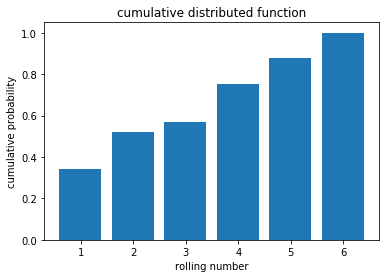

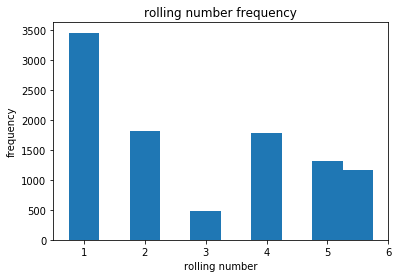

array([0.34, 0.52, 0.57, 0.75, 0.88, 1.  ])

In [85]:
import random
import numpy as np
def roll(bias_list):
    bias_list=[0.34,0.18,0.05,0.18,0.13,0.12]
    num=np.random.uniform(0,1)#return [0,1]
    current=0
    for n,bias in enumerate(bias_list):
        current+=bias
        if num<current:
            return n+1

bias_list=[0.34,0.18,0.05,0.18,0.13,0.12]
plt.subplot(111)
x = np.arange(6)
plt.bar(x, np.cumsum(bias_list))
plt.xticks(x+.01,x+1)
plt.title('cumulative distributed function')
plt.xlabel('rolling number')
plt.ylabel('cumulative probability')
plt.show()
# plot the cumulative function
rolling = [roll(bias_list) for _ in range(10000)]
plt.subplot(111)
plt.hist(rolling,align='left')
plt.title('rolling number frequency')
plt.xlabel('rolling number')
plt.ylabel('frequency')
plt.show()


np.cumsum(bias_list)

In [182]:
predict_x=np.mean(rolling)
std=np.std(rolling)
print("predict_x",predict_x)

expected_x=0
for k,v in enumerate(bias_list):
    expected_x+=(k+1)*v

print("expected_x",expected_x)

predict_x 2.9169
expected_x 2.9399999999999995


4. I use cumulative distributed function to display biased die, so I divide the section [0,1) to 6 parts depending on bias_list into the following: [0,0.34], [0.34,0.52], [0.52,0.57], [0.57,0.75], [0.75,0.88], [0.88,1] (check cumulative distributed function plot). Then I start generating 10000 time and draw in histogram (rolling number frequency), the distribution is really close to the probability of rolling number. Also, predict_expectation (2.9408) is close to true_expectation, too.